In [5]:
##################################

# FIND OPTIMAL K SELECTED FEATURES 

##################################

In [6]:
# 05/02/2025
from ipynb.fs.full.main import controller
from ipynb.fs.full.performance import performanceEval


"""
{
    k: {
        "model1": acc,
        "model2": acc,
        ...
    },
    k2: { ... },
    ...
    k_n,
    "kOptimal": {
      "model1": kO,
      "model2": kO,
      ...
    }

}
"""
def findOptimalK(metric = "accuracy", n = 30, tauRed = 0.5, models = ["regModel", "svmModel", "nbcModel", "knnModel", "dtModel"]):
  featuresResults = {"kOptimal": {}}
  res = controller(inFile = "data2", setNum = 2, procs = ["clean", "predMap"], inTestSize = 0.2, run = False);
  df = res["df"]
  for k in range(n+1):
    if k == 0: continue; # can't have 0 features
    resCtrl = controller(inFile = None, setNum = 2, inputDF = df, procs = ["CFS", "splitSet"], k = k, tauRed = tauRed, inTestSize = 0.2, run = True)
    Ypreds = resCtrl["Ypreds"]
    Ytest = resCtrl["Ytest"]
    featuresResults[k] = {}
    for model in models:
      perfm = performanceEval(Ytest, Ypreds["Ypred_" + model], model)
      featuresResults[k][model] = perfm[metric]
      if k == 1:
        featuresResults["kOptimal"][model] = k
      else:
        currentkO = featuresResults["kOptimal"][model]
        currentBestAcc = featuresResults[currentkO][model]
        if currentBestAcc < perfm[metric]: featuresResults["kOptimal"][model] = k

  return featuresResults

In [7]:
import pandas as pd

df = pd.read_csv("data2.csv")
length = len(df.columns) - 1 # -2 (for dataset 1) bc dw id and diagnosis, -1 for data set 2
res = findOptimalK(metric = "accuracy", n = length) 
res

Number of NANs in data set 2 : Area                 0
Grey Level           0
Gradient Strength    0
Noise Fluctuation    0
Contrast             0
Shape Descriptor     0
diagnosis            0
dtype: int64
Preparing to interpolate NANs...
Number of NANs now:  Area                 0
Grey Level           0
Gradient Strength    0
Noise Fluctuation    0
Contrast             0
Shape Descriptor     0
diagnosis            0
dtype: int64
Selected features: ['Contrast']
Num features: 1


/home/saatvikk/uni/yr3/bigboiproject/preprocessing.ipynb:15: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  "cell_type": "code",


regModel  accuracy (in %): 98.3907018328118
Predicted     0   1   All
Actual                   
0          2185   7  2192
1            29  16    45
All        2214  23  2237
svmModel  accuracy (in %): 98.52481001341081
Predicted     0   1   All
Actual                   
0          2192   0  2192
1            33  12    45
All        2225  12  2237
nbcModel  accuracy (in %): 97.0049172999553
Predicted     0   1   All
Actual                   
0          2147  45  2192
1            22  23    45
All        2169  68  2237
knnModel  accuracy (in %): 98.30129637907913
Predicted     0   1   All
Actual                   
0          2182  10  2192
1            28  17    45
All        2210  27  2237
dtModel  accuracy (in %): 98.25659365221279
Predicted     0   1   All
Actual                   
0          2177  15  2192
1            24  21    45
All        2201  36  2237
Selected features: ['Contrast', 'Noise Fluctuation']
Num features: 2
regModel  accuracy (in %): 98.6142154671435
Predicted     0

{'kOptimal': {'regModel': 4,
  'svmModel': 2,
  'nbcModel': 2,
  'knnModel': 5,
  'dtModel': 2},
 1: {'regModel': 98.3907018328118,
  'svmModel': 98.52481001341081,
  'nbcModel': 97.0049172999553,
  'knnModel': 98.30129637907913,
  'dtModel': 98.25659365221279},
 2: {'regModel': 98.6142154671435,
  'svmModel': 98.56951274027715,
  'nbcModel': 97.13902548055431,
  'knnModel': 98.43540455967815,
  'dtModel': 98.30129637907913},
 3: {'regModel': 98.6142154671435,
  'svmModel': 98.56951274027715,
  'nbcModel': 96.7814036656236,
  'knnModel': 98.6142154671435,
  'dtModel': 97.89897183728208},
 4: {'regModel': 98.65891819400984,
  'svmModel': 98.52481001341081,
  'nbcModel': 95.93205185516317,
  'knnModel': 98.6142154671435,
  'dtModel': 97.8095663835494},
 5: {'regModel': 98.65891819400984,
  'svmModel': 98.56951274027715,
  'nbcModel': 96.11086276262853,
  'knnModel': 98.88243182834154,
  'dtModel': 97.85426911041574},
 6: {'regModel': 98.65891819400984,
  'svmModel': 98.56951274027715,
  

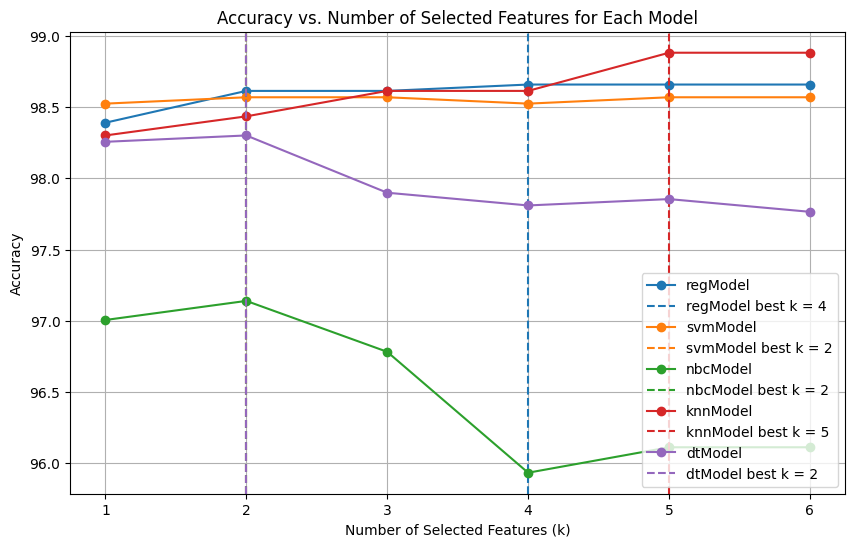

In [8]:
import matplotlib.pyplot as plt
# 05/02/2025
# OPTIMAL K GRAPHING
def kSelFeaturesGraphing(res, metric = "Accuracy", n = 30, models = ["regModel", "svmModel", "nbcModel", "knnModel", "dtModel"]):

    plt.figure(figsize=(10, 6))

    for model in models:
        k_values = list(range(1, n+1))  # k from 1 to 30
        # Get the accuracy values for this model for each k.
        acc_values = [res[k][model] for k in k_values]

        # Plot the model's performance line.
        line, = plt.plot(k_values, acc_values, marker='o', label=model)

        # Retrieve the optimal k for this model.
        optimal_k = res["kOptimal"][model]

        # Plot a vertical dashed line at the optimal k.
        plt.axvline(x=optimal_k, color=line.get_color(), linestyle='--',
                    label=f'{model} best k = {optimal_k}')

    plt.xlabel("Number of Selected Features (k)")
    plt.ylabel(metric)
    plt.title(metric + " vs. Number of Selected Features for Each Model")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()
kSelFeaturesGraphing(res, n = length, metric = "Accuracy")